### LIBRARIES

In [1]:
from main import ClusterHandler, load_sns_theme
import pandas as pd
import numpy as np
from pyspark.ml.feature import PCA
from pyspark.ml.regression import LinearRegression

### DATASET

In [2]:
data = pd.read_csv("data/molec_structure.csv")
data = data.drop(columns=["material"])

### SPARK SESSION

In [3]:
handler = ClusterHandler()
#handler = ClusterHandler(type='remote', ip='192.168.137.1', port='7077')

handler.context


Session 'Session' created on masternode local[*]
Spark UI (jobs tab) is available at http://SERENITY.mshome.net:4041



<SparkContext master=local[*] appName=Session>

### RIDGE REGRESSION

In [10]:
handler.generate_dataframe(data=data)
handler.dataframe.show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+-------------+
|  H| He| Li| Be|  B|  C|  N|  O|  F| Ne| Na| Mg| Al| Si|  P|  S| Cl| Ar|  K| Ca| Sc| Ti|  V| Cr| Mn| Fe| Co| Ni|  Cu| Zn| Ga| Ge| As| Se| Br| Kr| Rb|  Sr|  Y| Zr| Nb| Mo| Tc| Ru| Rh| Pd|  Ag| Cd| In| Sn| Sb| Te|  I| Xe| Cs|  Ba|  La| Ce| Pr| Nd| Pm| Sm| Eu| Gd| Tb| Dy| Ho| Er| Tm| Yb| Lu| Hf| Ta|  W| Re| Os| Ir| Pt| Au| Hg| Tl| Pb| Bi| Po| At| Rn|critical_temp|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+---+---+---+

In [11]:
input_columns = [feature for feature in data.columns if feature != "critical_temp"]
handler.assemble_features(input_columns=input_columns)
handler.scale_features()

In [12]:
ridge = LinearRegression(featuresCol="features", labelCol="critical_temp", elasticNetParam=0)

fit_results = handler.fit_lr(model=ridge, y_column="critical_temp", folds=5, reg_params=[0.001, 0.01, 0.1, 0.5, 1.0])
fit_results

{0.001: 0.5236953401687148,
 0.01: 0.5236169131173363,
 0.1: 0.5228392179453313,
 0.5: 0.5195444120914358,
 1.0: 0.5158381858595179}

In [13]:
handler.extract_lr_coefficients()

{'Ba': 20.599279739333866,
 'Hg': 14.163897321233028,
 'Sr': 11.762805128837302,
 'Ca': 8.344822020593652,
 'Ce': -7.091193748694841,
 'Tl': 6.926172666683172,
 'Dy': 6.767224750707801,
 'Tb': 5.696275015081364,
 'Rb': 5.689161862405324,
 'Yb': 5.656204683099382,
 'F': 5.3434120147183854,
 'Er': 5.339249629537532,
 'Ho': 5.310078660701085,
 'Cs': 5.198380887004294,
 'Mg': 5.018006689283056,
 'Lu': 4.921016215769519,
 'Y': 4.3767338149945845,
 'Sm': 4.279188482291626,
 'As': -3.693051429622919,
 'Si': -3.5591777260424586,
 'W': -3.3369879309362096,
 'Ag': -3.242082247047586,
 'Bi': 3.128034135504203,
 'Tc': -2.9964179806693827,
 'Sc': 2.931549113010107,
 'Gd': 2.9107207106624036,
 'Br': -2.7912998390377632,
 'I': -2.764001496738415,
 'Ge': -2.6396789547757855,
 'Tm': 2.6343818388647957,
 'Os': -2.527387737973989,
 'Na': 2.498824800929316,
 'Pt': -2.0093643296609986,
 'S': -1.8504156146748971,
 'Nd': 1.8055655842958735,
 'K': 1.6838235027205886,
 'Hf': -1.648226829398742,
 'Eu': -1.38977

### PCA - PRINCIPAL COMPONENT ANALYSIS

In [4]:
handler.generate_dataframe(data=data, y="critical_temp")
handler.dataframe.show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|  H| He| Li| Be|  B|  C|  N|  O|  F| Ne| Na| Mg| Al| Si|  P|  S| Cl| Ar|  K| Ca| Sc| Ti|  V| Cr| Mn| Fe| Co| Ni|  Cu| Zn| Ga| Ge| As| Se| Br| Kr| Rb|  Sr|  Y| Zr| Nb| Mo| Tc| Ru| Rh| Pd|  Ag| Cd| In| Sn| Sb| Te|  I| Xe| Cs|  Ba|  La| Ce| Pr| Nd| Pm| Sm| Eu| Gd| Tb| Dy| Ho| Er| Tm| Yb| Lu| Hf| Ta|  W| Re| Os| Ir| Pt| Au| Hg| Tl| Pb| Bi| Po| At| Rn|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+

In [5]:
handler.assemble_features()
handler.scale_features()

In [6]:
dimensions = 5
model = PCA(k=dimensions, inputCol="scaledFeatures", outputCol="pcaFeatures")
handler.fit_pca(model)

explained_variance = handler.pca_model.explainedVariance
print("Explained variance:", explained_variance)
print("Total explained variance:", np.sum(explained_variance))

Explained variance: [0.03570070222475506,0.033099733234341476,0.02609576045068447,0.024815300653723595,0.02391666105531339]
Total explained variance: 0.143628157618818


In [17]:
for dim in range(0, dimensions): 
    print(f"Coefficients for dimension {dim}: {handler.extract_pca_coefficients(dimension=dim)}")

Coefficients for dimension 0: {'O': -0.48382218059493864, 'Cu': -0.44296753389015825, 'Ba': -0.33785001048763547, 'Sr': -0.2464591783540548, 'Y': -0.22197462127071796, 'Fe': 0.20759685781767942, 'As': 0.1848971543266269, 'Pt': 0.1508292670874975, 'Bi': -0.14900887760492734, 'C': 0.12450193361921218, 'Ca': -0.11816355116351374, 'B': 0.1002067275493857, 'Nb': 0.09788388638252181, 'K': 0.09546510142673627, 'Tl': -0.09252549987010564, 'Ir': 0.092453369389358, 'Na': 0.09175730598881689, 'Ga': 0.0859333555075695, 'Hg': -0.08336100694039952, 'Mg': 0.08301919700641144, 'Rb': 0.08219335595446418, 'Gd': -0.08028103936045497, 'Se': 0.07971105704152721, 'V': 0.07640161755215599, 'S': 0.06955143478441576, 'Mo': 0.06935922694391791, 'Sb': 0.06846957543333428, 'Zr': 0.06838480495416843, 'N': 0.06663191615144475, 'Ta': 0.06612922247092626, 'Ni': 0.06546635768799182, 'In': 0.06513876146900116, 'H': 0.06510528041305089, 'Pd': 0.06392044375483488, 'Rh': 0.06162053892471374, 'Li': 0.06113562325199695, 'Lu

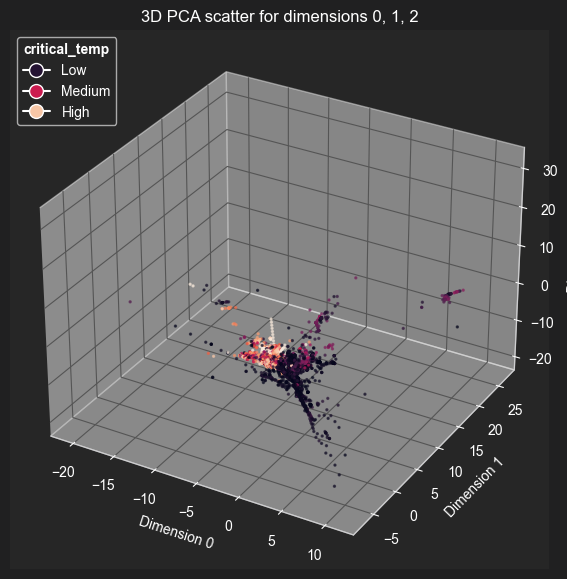

In [25]:
load_sns_theme(r"utilities\themes\fire_theme_full_dark.json")

handler.plot_3d_pca(dimensions=[0,1,2], color_by="critical_temp")

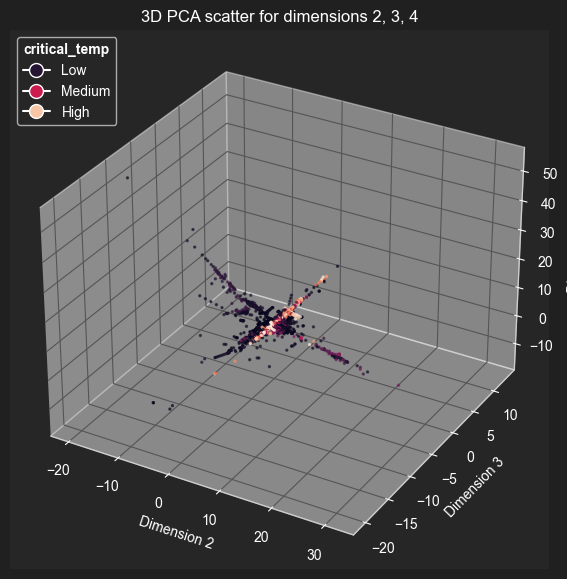

In [26]:
handler.plot_3d_pca(dimensions=[2,3,4], color_by="critical_temp")

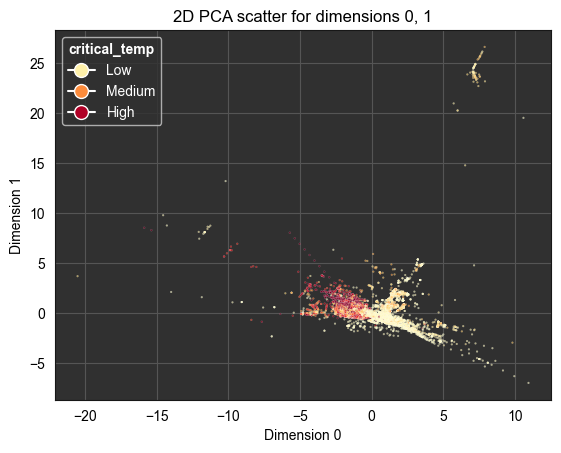

In [8]:
load_sns_theme(r"utilities\themes\fire_theme.json")

handler.plot_2d_pca(dimensions=[0,1], color_by="critical_temp", cmap="YlOrRd")